In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder  , StandardScaler , RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , BernoulliNB , CategoricalNB , MultinomialNB , ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , precision_score, recall_score, f1_score,ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split , KFold
from imblearn.over_sampling import SMOTE

import seaborn as sns
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras









sns.set()


In [296]:
# Cargamos el dataset
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [297]:
#Verificamos la dimensión del dataset
df.shape

(5110, 12)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [300]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [301]:
#Eliminamos la columna id
df.drop('id' , axis = 1 , inplace = True)

In [302]:
#Chequeando valores nulos
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [303]:
#Interpolación lineal para completar faltantes de la columna BMI 
df['bmi']=df['bmi'].interpolate()

In [304]:
#Verificación que ya no hay valores nulos
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [305]:
#Verificamos si hay duplicados
df.duplicated().sum()

0

Realizamos gráficos para estudiar los features

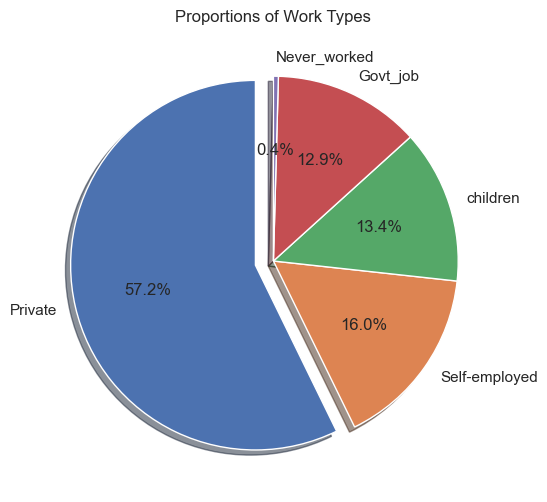

In [85]:
dfworktype=df['work_type']

count=dfworktype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Work Types')
plt.show()

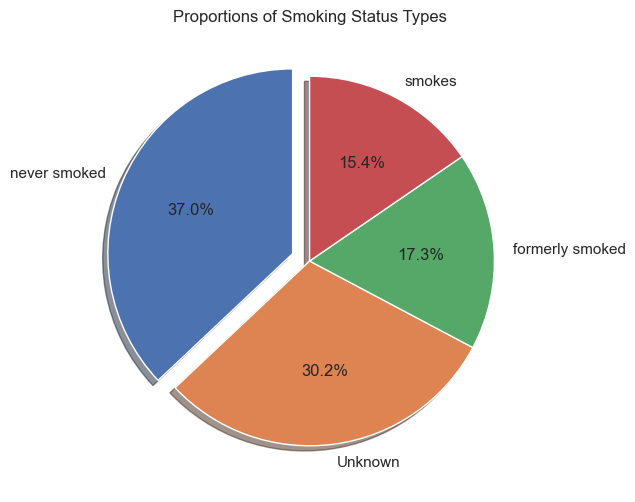

In [14]:
dfsmoketype=df['smoking_status']

count=dfsmoketype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Smoking Status Types')
plt.show()

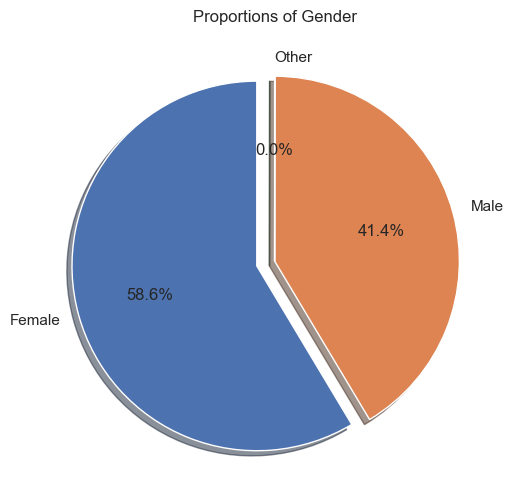

In [15]:
dfsmoketype=df['gender']

count=dfsmoketype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Gender')
plt.show()

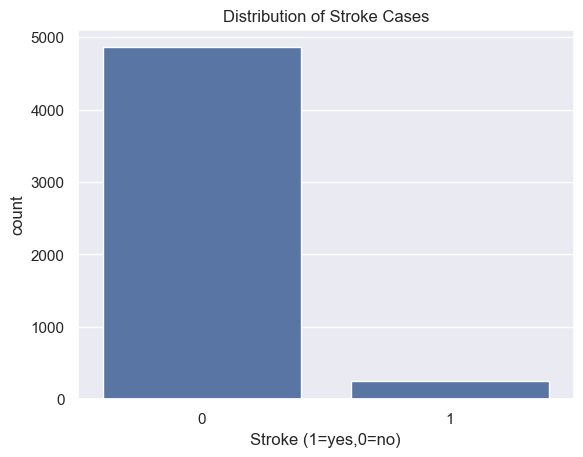

In [16]:
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (1=yes,0=no)')
plt.show()

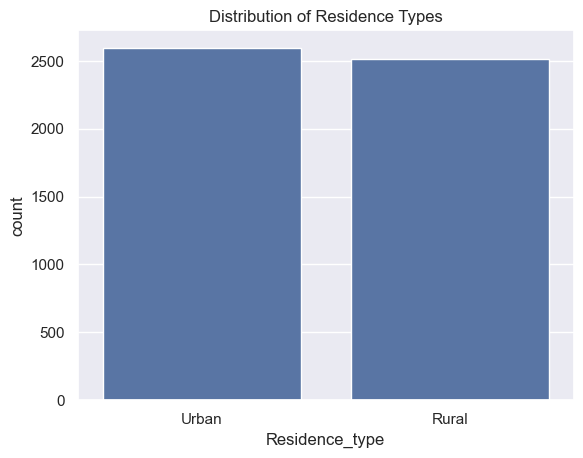

In [17]:
sns.countplot(x='Residence_type', data=df)
plt.title('Distribution of Residence Types')
plt.show()

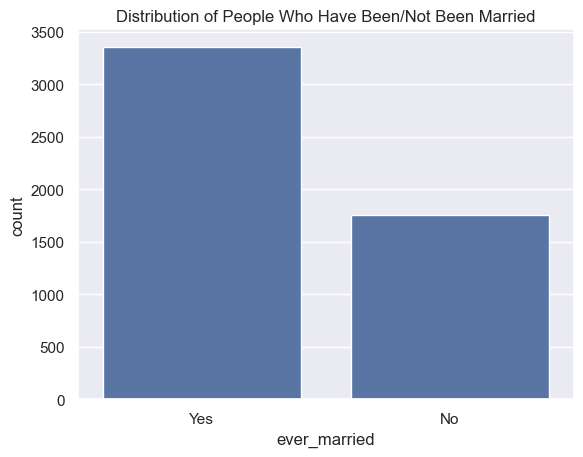

In [18]:
sns.countplot(x='ever_married', data=df)
plt.title('Distribution of People Who Have Been/Not Been Married')
plt.show()

<Axes: title={'center': 'Correlation Map'}>

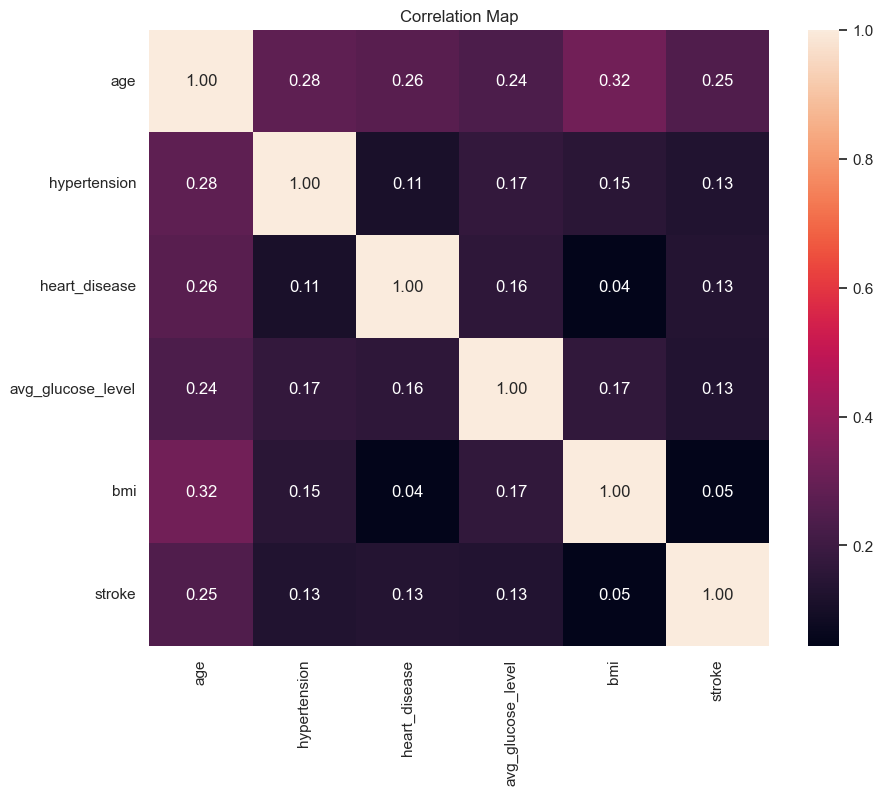

In [19]:
# Realizamos el mapa de correlación entre variables numéricas
number = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(number.corr(),annot=True, fmt='.2f')

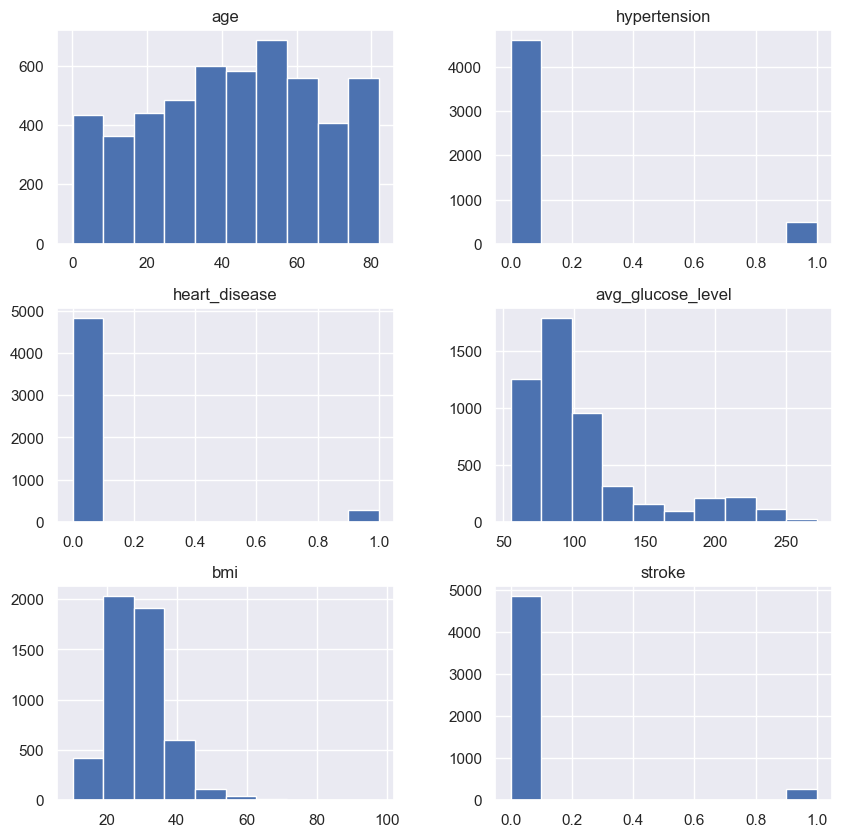

In [20]:
df.hist(figsize= (10 , 10))
plt.show()

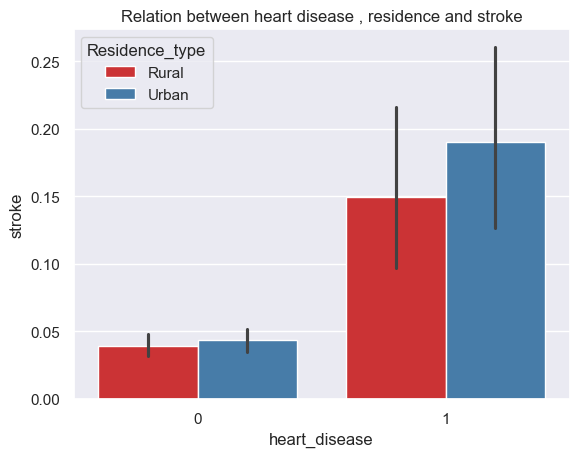

In [21]:
sns.barplot(data = df , x='heart_disease' , y = 'stroke' , hue ='Residence_type' , palette = 'Set1')
plt.title('Relation between heart disease , residence and stroke')
plt.show()

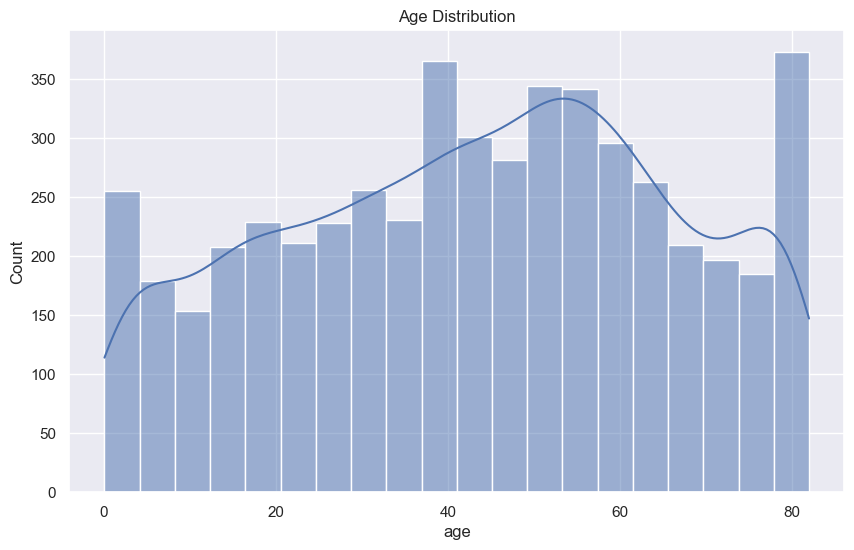

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title('Age Distribution')
plt.show()

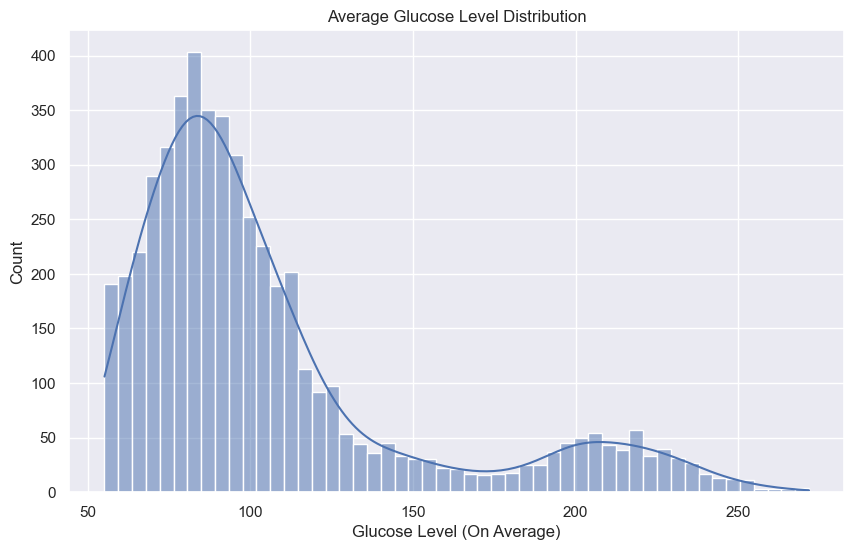

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="avg_glucose_level", kde=True)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Glucose Level (On Average)')
plt.show()

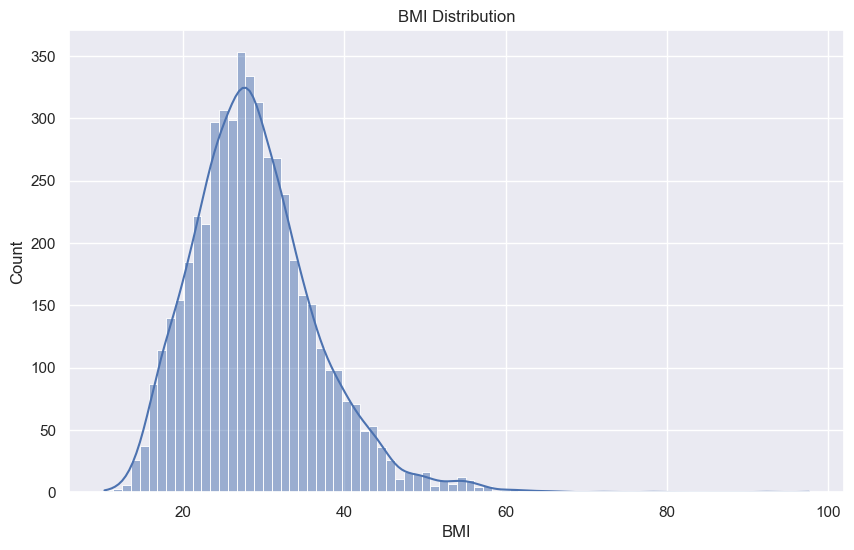

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="bmi", kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

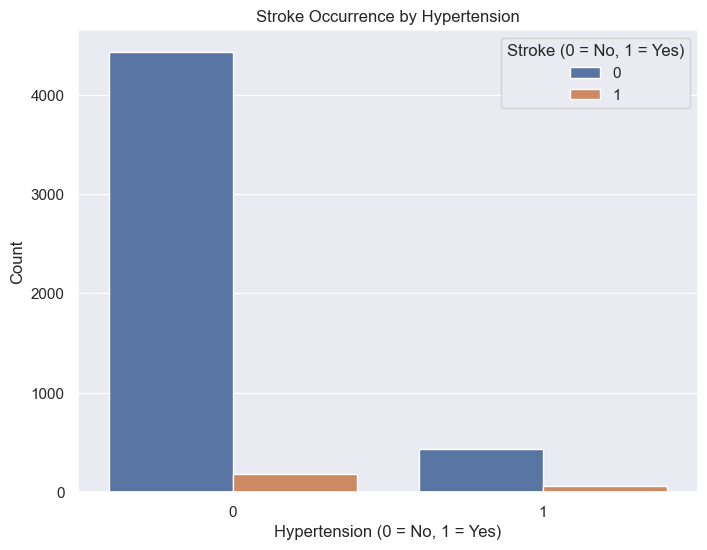

In [25]:
plt.figure(figsize=(8, 6))

sns.countplot(x='hypertension', hue='stroke', data=df)

plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke (0 = No, 1 = Yes)')


plt.show()

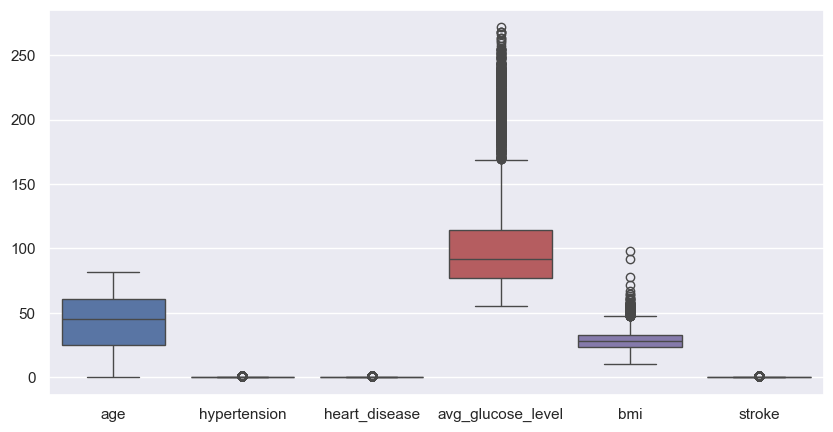

In [26]:
plt.figure(figsize=(10 , 5))
sns.boxplot(data = df)
plt.show("Checking if there is outliers")
plt.show()

Encoding

In [306]:
# Transformamos las variables categóricas a numéricas
cols = df.select_dtypes('object').nunique().sort_values(ascending=False).index
cols

Index(['work_type', 'smoking_status', 'gender', 'ever_married',
       'Residence_type'],
      dtype='object')

In [307]:
for col in cols:
    lb = LabelEncoder()
    df[col] = lb.fit_transform(df[col])

In [308]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,34.55,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1


Splitting and Scaling

In [309]:
#Verificamos si la clase de la variable target está balanceada
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [310]:
X = df.drop('stroke' , axis=1) 
y = df['stroke']

In [311]:
scaler = RobustScaler()

Before oversampling

In [312]:
X = scaler.fit_transform(X)

In [313]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=42)



In [314]:
models = { 'Logistic Regression': LogisticRegression(max_iter=1000), 
            'DT' : DecisionTreeClassifier(criterion='log_loss' , max_depth=50),
            'RF': RandomForestClassifier(n_estimators=20 , criterion='log_loss' , max_depth=50),
            'KNN' : KNeighborsClassifier(n_neighbors= 3),
            'NB' : GaussianNB(),
            'SVM' : SVC(kernel= 'rbf' , C=.01 , gamma=.01)
            }

In [315]:
Acc = []
Precision = []
Recall = []
F1score = []
conv = {}

In [316]:
for k, v in models.items():
    v.fit(X_train , y_train)
    y_pred = v.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred ))
    F1score.append(f1_score(y_test, y_pred))
    conv[k] = confusion_matrix(y_test, y_pred)
    print('Finished')

C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Finished
Finished
Finished
Finished
Finished
Finished


C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [317]:
Result = pd.DataFrame({'Models' : models.keys(), 'Accuracy': Acc , 'Precision': Precision , 'Recall': Recall ,'F1score': F1score}  )

In [318]:
Result.sort_values(by='F1score' , ascending=False).style.background_gradient(cmap='BuPu')

,Models,Accuracy,Precision,Recall,F1score
4,NB,0.865949,0.218045,0.467742,0.297436
1,DT,0.905088,0.142857,0.112903,0.126126
2,RF,0.941292,1.000000,0.032258,0.062500
0,Logistic Regression,0.939335,0.000000,0.000000,0.000000
3,KNN,0.935421,0.000000,0.000000,0.000000
5,SVM,0.939335,0.000000,0.000000,0.000000


After oversampling

¿Qué es SMOTE?
SMOTE es una técnica que combate el problema de los conjuntos de datos desequilibrados, donde una clase (la clase minoritaria) tiene muchas menos muestras que la clase mayoritaria. En lugar de simplemente copiar las muestras existentes de la clase minoritaria, SMOTE genera nuevas muestras sintéticas. Lo hace creando puntos nuevos que están en el espacio entre los puntos existentes de la clase minoritaria, basándose en sus vecinos más cercanos.

In [340]:
sm=SMOTE(random_state=42)
X_smote,y_smote=sm.fit_resample(X,y)
X_smote=pd.DataFrame(X_smote)
y_smote=pd.DataFrame(y_smote)


In [341]:
X_smote.shape

(9722, 10)

In [342]:

y_smote.shape


(9722, 1)

In [343]:
X_smote = scaler.fit_transform(X_smote)

In [344]:
X_train , X_test , y_train , y_test = train_test_split(X_smote , y_smote , test_size=0.2 , shuffle=True , random_state=42)

In [324]:
models = { 'Logistic Regression': LogisticRegression(max_iter=1000), 
            'DT' : DecisionTreeClassifier(criterion='log_loss' , max_depth=50),
            'RF': RandomForestClassifier(n_estimators=20 , criterion='log_loss' , max_depth=50),
            'KNN' : KNeighborsClassifier(n_neighbors= 3),
            'NB' : GaussianNB(),
            'SVM' : SVC(kernel= 'rbf' , C=.01 , gamma=.01)
            }

In [325]:
Acc = []
Precision = []
Recall = []
F1score = []
conv = {}

In [326]:
for k, v in models.items():
    v.fit(X_train , y_train)
    y_pred = v.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred ))
    F1score.append(f1_score(y_test, y_pred))
    conv[k] = confusion_matrix(y_test, y_pred)
    print('Finished')

C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished
Finished
Finished
Finished
Finished


C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finished


In [327]:
Result = pd.DataFrame({'Models' : models.keys(), 'Accuracy': Acc , 'Precision': Precision , 'Recall': Recall ,'F1score': F1score}  )

In [328]:
Result.sort_values(by='F1score' , ascending=False).style.background_gradient(cmap='BuPu')

,Models,Accuracy,Precision,Recall,F1score
2,RF,0.957841,0.954918,0.960825,0.957862
3,KNN,0.922879,0.874771,0.986598,0.927326
1,DT,0.925450,0.916246,0.936082,0.926058
0,Logistic Regression,0.776350,0.756472,0.813402,0.783905
5,SVM,0.725964,0.652053,0.965979,0.778563
4,NB,0.755270,0.725365,0.819588,0.769603


In [237]:
Higher_model = Result.sort_values(by='F1score' , ascending=False).head(1)['Models'].reset_index(drop=True)[0]

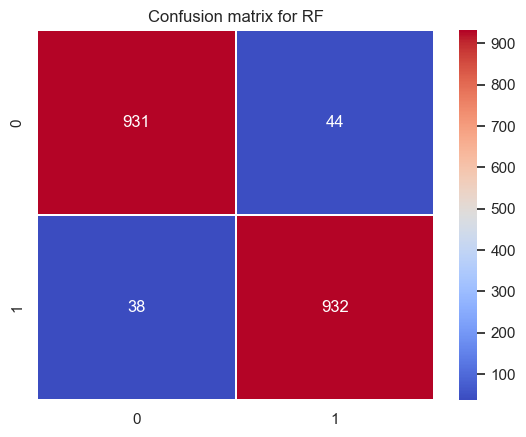

In [329]:
sns.heatmap(conv[Higher_model], annot=True , cmap='coolwarm' , linewidths = 0.01 , fmt='g')
plt.title(f"Confusion matrix for {Higher_model}")
plt.show()

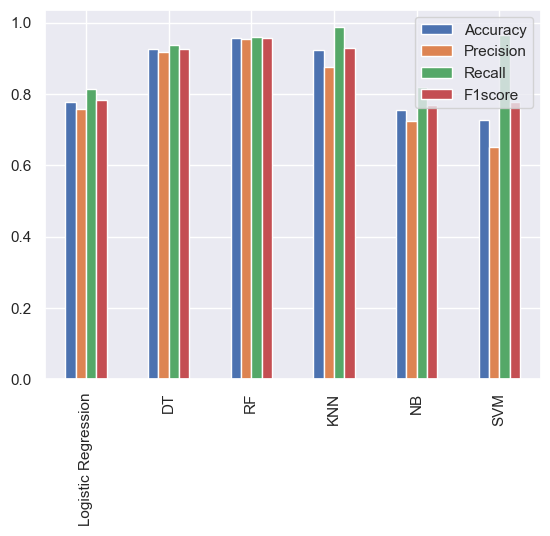

In [330]:
Result.plot.bar()
plt.xticks(ticks=range(len(Result)), labels=Result['Models'])
plt.show()

 Red Feed-Foward 

In [345]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


In [346]:
X_smote.shape

(9722, 10)

In [347]:
y_smote.shape

(9722, 1)

In [348]:


# Crear DataFrame con X_smote
df_smote = pd.DataFrame(X_smote, columns=df.drop(columns='stroke').columns)

# Agregar la columna de etiquetas y_smote
df_smote['stroke'] = y_smote


In [352]:
X_smote = df_smote.drop(columns='stroke').values
X_smote= X_smote.astype(float)
y_smote = df_smote.iloc[:, -1].values
y_smote = y_smote.astype(float)

In [353]:
X_smote.shape

(9722, 10)

In [354]:
y_smote.shape

(9722,)

In [355]:

# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

# Convertimos en tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Creamos usando DataLoader los sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [356]:
class BinaryNetwork(torch.nn.Module):
    """
    Red neuronal para clasificación binaria.

    Esta red neuronal consiste en múltiples capas totalmente conectadas con normalización por lotes
    y funciones de activación ReLU. La capa de salida utiliza una función de activación sigmoide
    para producir probabilidades de clasificación binaria.

    Args:
        input_size (int): El número de características de entrada.
    """
    def __init__(self, input_size):
        """
        Inicializa el modelo BinaryNetwork.

        Args:
            input_size (int): El número de características de entrada.
        """
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.BatchNorm1d(input_size),
            torch.nn.Linear(input_size, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1)
        )
        
    def forward(self, x):
        """
        Paso hacia adelante a través de la red.
        Args:
            x (torch.Tensor): Tensor de entrada de forma (batch_size, input_size).
        Returns:
            torch.Tensor: Tensor de salida conteniendo probabilidades de clasificación binaria.
        """
        x = self.layers(x)
        return torch.sigmoid(x)  # Escalamos los valores entre 0 y 1

In [357]:
# Inicialización del modelo, función de pérdida y optimizador
input_size = 10 # número de características
model = BinaryNetwork(input_size)

loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [364]:
# Bucle de entrenamiento con un tope de 4500 iteraciones
epochs = 4500
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(1, epochs + 1):
    #  Entrenamiento
    model.train()  # Establecer el modelo en modo de entrenamiento
    train_loss = 0.0
    for features, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = loss_fn(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * features.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validación
    model.eval()  # Establecer el modelo en modo de evaluación
    val_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for features, targets in val_loader:
            outputs = model(features)
            loss = loss_fn(outputs, targets.unsqueeze(1))
            val_loss += loss.item() * features.size(0)
            val_preds.extend(outputs.round().squeeze().tolist())
            val_targets.extend(targets.tolist())
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    
    # Calcula la precisión de la validación
    val_accuracy = accuracy_score(val_targets, val_preds)
    val_accuracies.append(val_accuracy)
    
    # Print estadísticas de entrenamiento/validación
    print(f'Época: {epoch}/{epochs}, Costo de Entrenamiento: {train_loss:.4f}, '
          f'Costo de Validación: {val_loss:.4f}, Exactitud en Validación: {val_accuracy:.4f}')


Época: 1/4500, Costo de Entrenamiento: 0.3442, Costo de Validación: 0.3758, Exactitud en Validación: 0.8380
Época: 2/4500, Costo de Entrenamiento: 0.3402, Costo de Validación: 0.3728, Exactitud en Validación: 0.8419
Época: 3/4500, Costo de Entrenamiento: 0.3427, Costo de Validación: 0.3747, Exactitud en Validación: 0.8329
Época: 4/4500, Costo de Entrenamiento: 0.3445, Costo de Validación: 0.3752, Exactitud en Validación: 0.8393
Época: 5/4500, Costo de Entrenamiento: 0.3449, Costo de Validación: 0.3750, Exactitud en Validación: 0.8342
Época: 6/4500, Costo de Entrenamiento: 0.3451, Costo de Validación: 0.3750, Exactitud en Validación: 0.8432
Época: 7/4500, Costo de Entrenamiento: 0.3440, Costo de Validación: 0.3722, Exactitud en Validación: 0.8380
Época: 8/4500, Costo de Entrenamiento: 0.3433, Costo de Validación: 0.3711, Exactitud en Validación: 0.8432
Época: 9/4500, Costo de Entrenamiento: 0.3468, Costo de Validación: 0.3724, Exactitud en Validación: 0.8432
Época: 10/4500, Costo de Ent

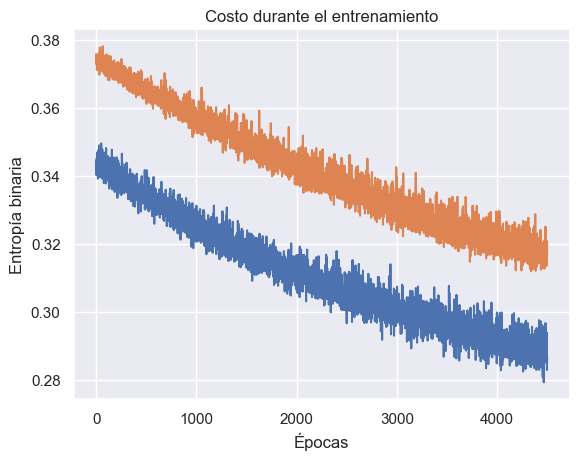

In [365]:
# Graficamos el costo durante el entrenamiento
graph = sns.lineplot(x=[x for x in range(0, epochs)], y=train_losses)
sns.lineplot(x=[x for x in range(0, epochs)], y=val_losses)
graph.set(title="Costo durante el entrenamiento", xlabel='Épocas', ylabel='Entropía binaria')
plt.show()

Test Accuracy: 0.8895


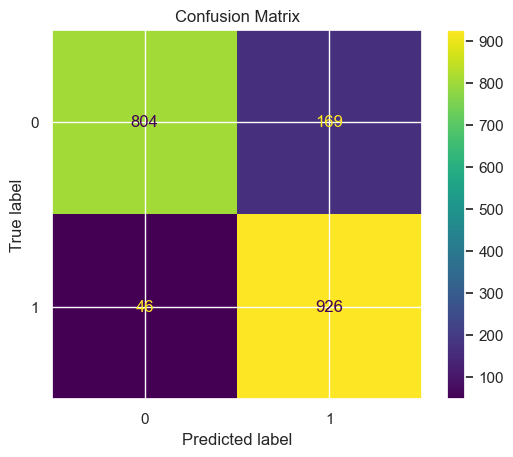

In [366]:
# Evaluacion en el conjunto de prueba
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_outputs = (test_outputs >= 0.5).float()
    test_accuracy = accuracy_score(y_test_tensor, test_outputs)
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test_tensor, test_outputs)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

In [367]:
# Evaluamos el modelo
y_pred_list = []
y_pred_proba_list = []
model.eval()
with torch.no_grad():
    for X, y in test_loader:
        y_test_pred = model(X)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag)
        y_pred_proba_list.append(y_test_pred)

# Convertimos a la salida en un solo tensor
y_pred_tensor = torch.cat(y_pred_list).squeeze()
y_pred_proba_tensor = torch.cat(y_pred_proba_list).squeeze()

In [368]:
from sklearn.metrics import f1_score, accuracy_score

print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred_tensor)*100: .0f}%")
print(f"F1-score de testeo fue: {f1_score(y_test, y_pred_tensor)}")

El porcentaje de exactitud es de: 89%
F1-score de testeo fue: 0.895984518626028


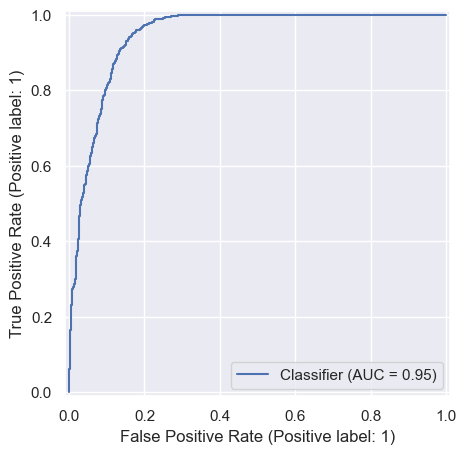

In [369]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_proba_tensor, ax=ax)

plt.show();

In [370]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Convertimos las probabilidades a predicciones binarias (0 o 1)
y_pred_binary = (y_pred_proba_tensor >= 0.5).int()

# Classification Report
report = classification_report(y_test_tensor, y_pred_binary)
print('Métricas para redes neuronales:')
print(report)

# Calculamos las métricas de evaluación usando las predicciones binarias
accuracy = accuracy_score(y_test_tensor, y_pred_binary)
precision = precision_score(y_test_tensor, y_pred_binary, average='binary')  # usamos binary porque es un problema de clasificación binaria
recall = recall_score(y_test_tensor, y_pred_binary, average='binary')
f1 = f1_score(y_test_tensor, y_pred_binary, average='binary')
mse = mean_squared_error(y_test_tensor, y_pred_binary)  # MSE entre las clases reales y las predicciones binarias

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Métricas para redes neuronales:
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88       973
         1.0       0.85      0.95      0.90       972

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945

Accuracy: 0.89
Precision: 0.85
Recall: 0.95
F1 Score: 0.90
Mean Squared Error: 0.11


Otro modelo de Red Neuronal usando Tensorflow

In [430]:
# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [431]:
X_train.shape

(6999, 10)

In [432]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
model.fit(X_train, y_train, class_weight={0: class_weights[0], 1: class_weights[1]})

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9432 - loss: 0.1713


In [434]:

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))


In [435]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.2)

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5862 - loss: 0.6431 - val_accuracy: 0.7800 - val_loss: 0.5031
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7834 - loss: 0.4799 - val_accuracy: 0.7950 - val_loss: 0.4516
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7924 - loss: 0.4456 - val_accuracy: 0.7964 - val_loss: 0.4398
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4304 - val_accuracy: 0.7979 - val_loss: 0.4317
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8111 - loss: 0.4124 - val_accuracy: 0.8057 - val_loss: 0.4253
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8137 - loss: 0.4077 - val_accuracy: 0.8114 - val_loss: 0.4186
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8171 - loss: 0.3994 - val_accuracy: 0.8086 - val_loss: 0.4154
Epoch 8/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.3954 - val_accuracy: 0.8129 - v

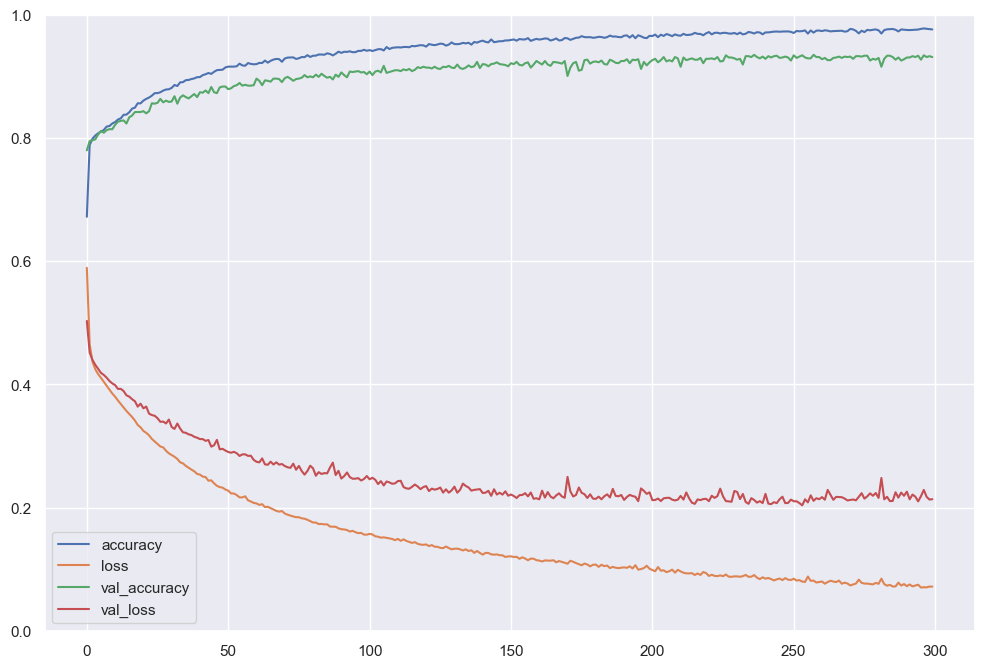

In [436]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [437]:
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.9407 - loss: 0.2256
Loss     :  0.21241551637649536
accuracy :  0.9398457407951355


In [438]:
class_names = ["0", "1"]
print(classification_report(y_test, y_pred, target_names = class_names))

              precision    recall  f1-score   support

           0       0.48      0.25      0.33       972
           1       0.49      0.73      0.59       973

    accuracy                           0.49      1945
   macro avg       0.48      0.49      0.46      1945
weighted avg       0.48      0.49      0.46      1945



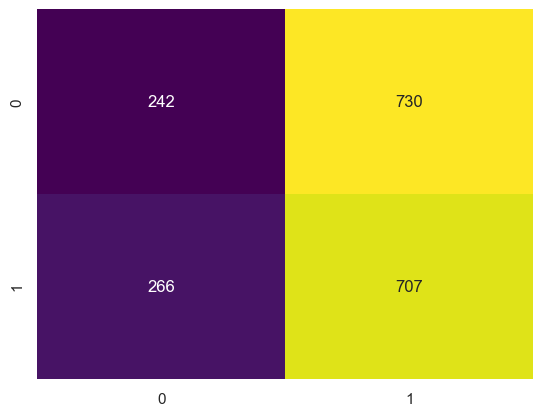

In [439]:
conf_matx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
plt.show()

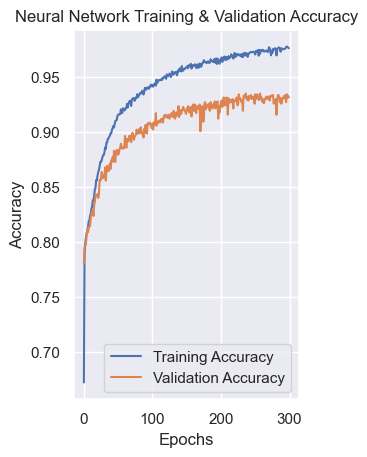

In [440]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Neural Network Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

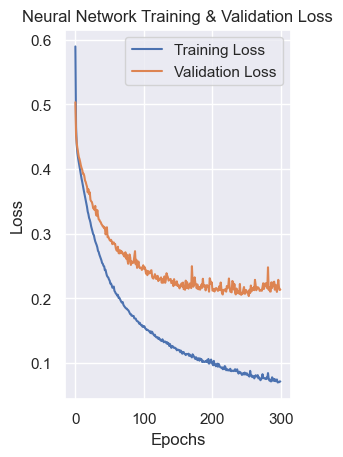

In [441]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Neural Network Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()